# Gold, silver and bronze. The Olympic Games through Data.

### Index

1. Objective
2. Methods
3. Data Analysis
4. Key findings
5. Conclusions
6. References

## 1. Objective:

The Olympic Games are one of the most prestigious and historic sporting events in the world, dating back to their origins in ancient Greece around 776 BC. The modern Olympic Games were revived in 1896, and since then, they have grown into a global event that showcases the athletic prowess of nations worldwide. Over the decades, the Olympics have evolved not only as a celebration of sports but also as a reflection of global political, economic, and social dynamics.

In this project, we aim to analyze the performance of countries in the Olympic Games by examining the distribution of medals (gold, silver, bronze) and exploring the relationship between a country's economic strength, measured by Gross Domestic Product (GDP), and its success in terms of total Olympic medals won. This analysis is particularly timely, as it coincides with the Paris Olympic Games of 2024, providing a unique opportunity to delve into how economic factors might influence athletic performance on the global stage.

## 2. Methods

1. Data Collection:

- Olympic medal data was sourced from Wikipedia's All-time Olympic Games medal table.
- GDP data for the years 2022 and 2023 was sourced from the World Bank.

2. Data Cleaning and Preprocessing:

- The data was cleaned by removing irrelevant entries, normalizing country names, and handling missing data.
- GDP values were consolidated, with 2023 data being prioritized unless unavailable, in which case 2022 values were used.

3. Exploratory Data Analysis (EDA):

- Histograms were used to explore the distribution of medals among countries.
- Proportions of gold, silver, and bronze medals were calculated and visualized for countries that have participated in the most Olympic Games.

4. Correlation Analysis:

- Pearson correlation was used to assess the relationship between GDP and the total number of medals won.
- The analysis was conducted both with and without outliers (specifically, the USA and China) to understand their impact on the overall trend.

## 3. Data Analysis

In [56]:
# Import of the necessary Python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr


In [57]:
# Data import from the Wikipedia
tables = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table')
all_data = tables[1]

In [58]:
# Adjusts the column headers by removing multi-level indexing and renaming for clarity
all_data.columns = all_data.columns.droplevel(0)

In [59]:
# This renames the resulting columns
all_data.columns = ['Team', 'No.', 'Gold', 'Silver', 'Bronze', 'Total', 'Winter No.', 'Winter Gold', 'Winter Silver', 'Winter Bronze', 'Winter Total', 'Combined No.', 'Combined Gold', 'Combined Silver', 'Combined Bronze', 'Combined Total']

# I create another DataFrame, specifically for my analysis purpose. 'sog' stands for 'Summer Olympic Games'
column_names = ['Team',	'No.', 'Gold', 'Silver', 'Bronze', 'Total']
sog_df = all_data[column_names]

# The columns are renamed to lowercase for consistency
sog_df = sog_df.rename(columns={'No.': 'Games', 'Team': 'Country'})
sog_df = sog_df.rename(columns=str.lower)

In [60]:
def clean_country_name(name):
    ''' Remove anything in parentheses or square brackets from a string'''
    return re.sub(r'\s*[\(\[].*?[\)\]]', '', name)

sog_df.loc[:, 'country'] = sog_df['country'].apply(clean_country_name)

In [61]:
# Excludes certain non-standard entries like combined teams or defunct teams from the dataset.

discard_countries = ['Australasia', 'United Team of Germany', 'Unified Team', 'Olympic Athletes from Russia', 'ROC', 'Independent Olympic Athletes', 'Independent Olympic Participants', 'Mixed team', 'Totals']
discard_df = sog_df[sog_df.country.isin(discard_countries)]
sog_df = sog_df.drop(discard_df.index)

In [86]:
# Standardization of the plot and subplot sizes
plot_size = (8, 6)

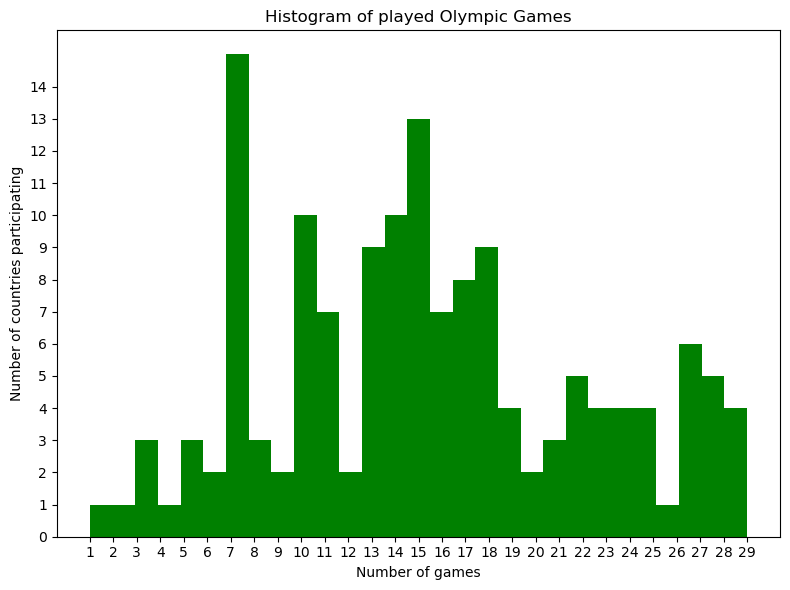

In [87]:
# Creates a histogram to show the distribution of countries by the number of Olympic Games they have attended

fig, ax = plt.subplots(figsize=plot_size)

ax.set_xlabel('Number of games')
ax.set_ylabel('Number of countries participating')
ax.set_xticks([i for i in range(1, 30)])
ax.set_yticks([i for i in range(0, 15, 1)])

plt.hist(sog_df.games, bins=29, color='green')
plt.title('Histogram of played Olympic Games')
plt.tight_layout()
plt.show()

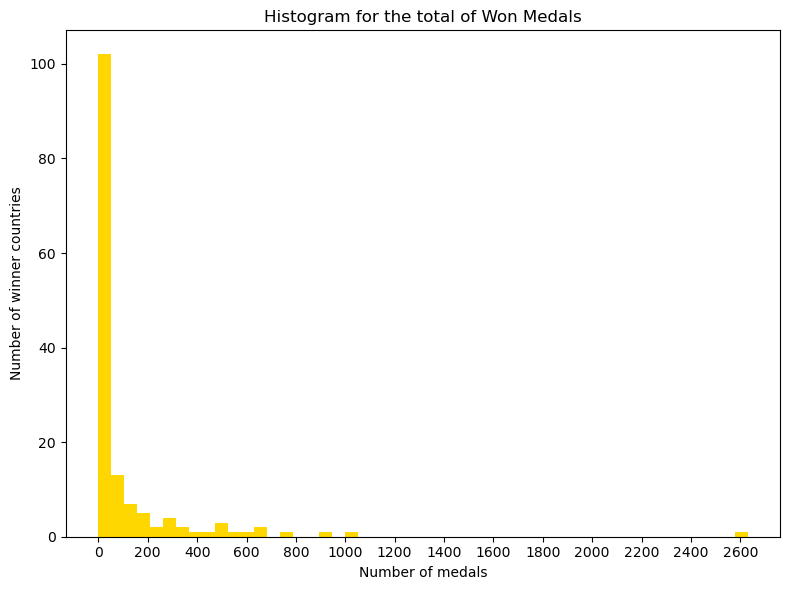

In [89]:
# This second histogram shows the distribution of total medals won by countries

fig, ax = plt.subplots(figsize=plot_size)

ax.set_xlabel('Number of medals')
ax.set_ylabel('Number of winner countries')
ax.set_xticks([i for i in range(0, 2601, 200)])

plt.hist(sog_df.total, bins=50, color='gold')
plt.title('Histogram for the total of Won Medals')
plt.tight_layout()
plt.show()

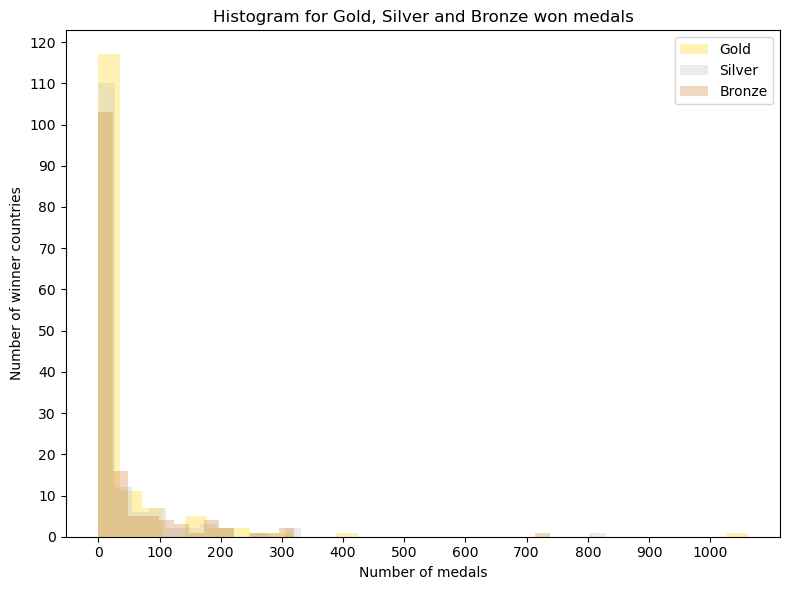

In [90]:
# Calculates the proportion of each type of medal relative to the total for countries that have participated in many games

fig, ax = plt.subplots(figsize=plot_size)

ax.set_xlabel('Number of medals')
ax.set_ylabel('Number of winner countries')

ax.set_xticks([i for i in range(0, 1001, 100)])
ax.set_yticks([i for i in range(0, 121, 10)])

plt.hist(sog_df.gold, bins=30, alpha=0.3, color='#FFD700')
plt.hist(sog_df.silver, bins=30, alpha=0.3, color='#C0C0C0')
plt.hist(sog_df.bronze, bins=30, alpha=0.3, color='#CD7F32')

plt.title('Histogram for Gold, Silver and Bronze won medals')
plt.legend(['Gold', 'Silver', 'Bronze'])
plt.tight_layout()
plt.show()

In [66]:
# This code creates a new dataframe with the 20 countries which have participated the most in the Summer Olympic Games
# The criteria for choosing them has been equal or more than 25 times (29 times is the maxmimum)
most_games_countries = sog_df[sog_df.games >= 25]
most_games_countries = most_games_countries.sort_values('games', ascending=False)
most_games_countries.reset_index(inplace=True, drop=True)

In [67]:
# Calculates the proportion of each type of medal relative to the total for countries that have participated in many games.
most_games_countries['gold_prop'] = most_games_countries['gold'] / most_games_countries['total']
most_games_countries['silver_prop'] = most_games_countries['silver'] / most_games_countries['total']
most_games_countries['bronze_prop'] = most_games_countries['bronze'] / most_games_countries['total']

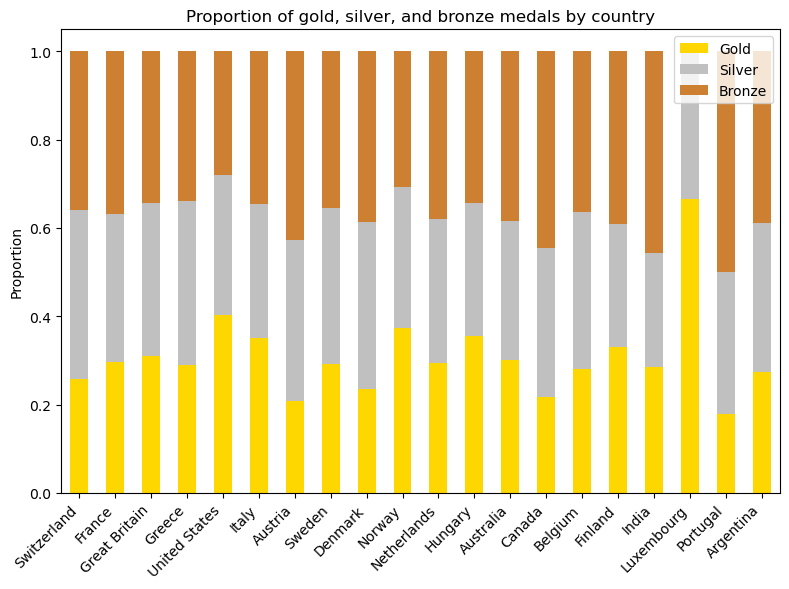

In [91]:
# A bar chart that displays the proportions between, won medals (gold, silver and bronze) and the number of attended games.

fig, ax = plt.subplots(figsize=plot_size)

most_games_countries[['gold_prop', 'silver_prop', 'bronze_prop']].plot(kind='bar', stacked=True, ax=ax, color=['#FFD700', '#C0C0C0', '#CD7F32'])

ax.set_xticklabels(most_games_countries['country'], rotation=45, ha='right')
ax.set_ylabel('Proportion')

plt.title('Proportion of gold, silver, and bronze medals by country')
plt.legend(['Gold', 'Silver', 'Bronze'], loc='upper right')
plt.tight_layout()
plt.show()

In [69]:
# Createsa new column with the average medals per game of the 20 countries which have been more times in The Olympic Games
most_games_countries['mean_medals'] = most_games_countries['total'] / most_games_countries['games']
most_games_countries_mean_sorted = most_games_countries.sort_values('mean_medals', ascending=False)

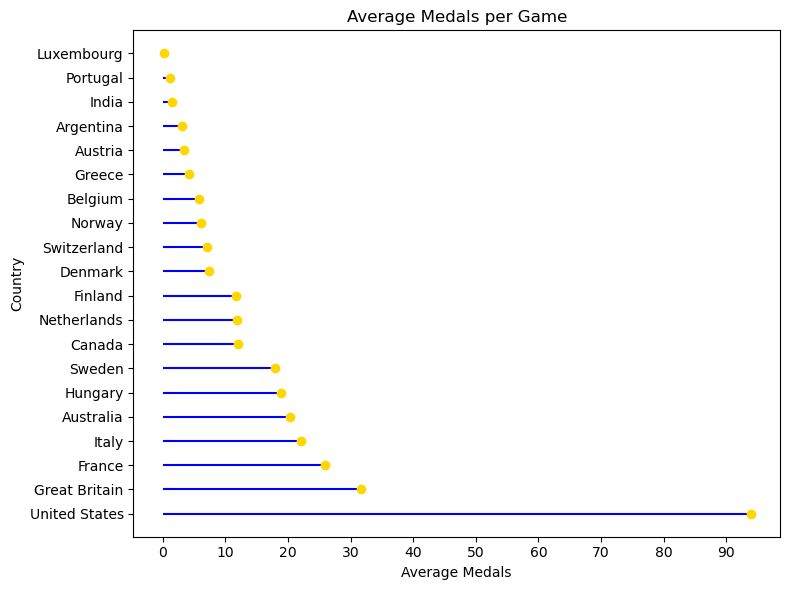

In [97]:
# Lollipop chart of the average medals per game 
fig, ax = plt.subplots(figsize=plot_size)

ax.hlines(y=most_games_countries_mean_sorted['country'], xmin=0, xmax=most_games_countries_mean_sorted['mean_medals'], color='blue')
ax.plot(most_games_countries_mean_sorted['mean_medals'], most_games_countries_mean_sorted['country'], 'o', color='gold')
ax.set_xlabel('Average Medals')
ax.set_ylabel('Country')
ax.set_xticks([i for i in range(0, 91, 10)])

plt.title('Average Medals per Game')
plt.tight_layout()
plt.show()

In [71]:
# Load of GDP data
gdp_df = pd.read_csv('gdp_data.csv')

In [72]:
# Cleaning and preparation of the GDP data
gdp_df = gdp_df[['Country Name', '2022', '2023']]
gdp_df['gdp_2023'] = gdp_df['2023'].fillna(gdp_df['2022'])
gdp_df = gdp_df.dropna(subset=['gdp_2023'])
gdp_df = gdp_df.rename(columns={'Country Name': 'country_name'})
gdp_df = gdp_df[['country_name', 'gdp_2023']]

In [73]:
# Here I merge 'sog_df' and 'gdp_df' into one only DataFrame. 
# As there was not gdp information of all the countries in 'sog_df', only those with gdp data remain in all_data_df
# 'sog_df' had 148 countries, and 'all_data_df' has only 117

all_data_df = pd.merge(
    sog_df, 
    gdp_df,
    left_on='country',
    right_on = 'country_name')

all_data_df = all_data_df.drop('country_name', axis=1)

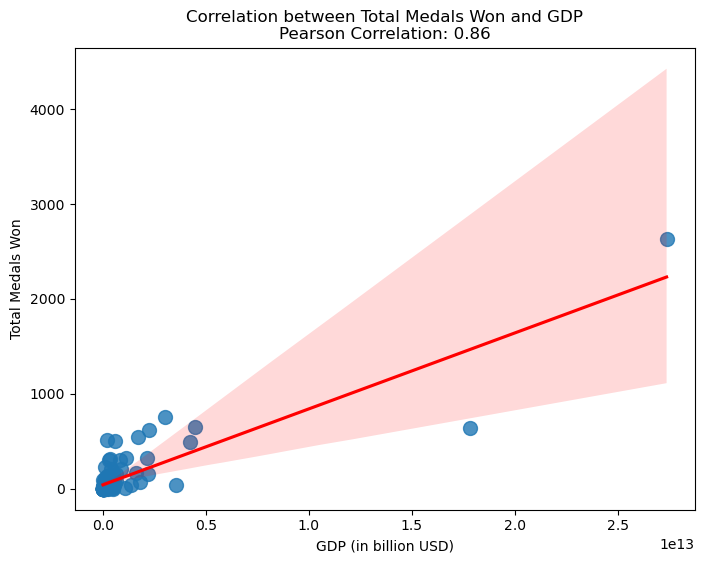

In [93]:
# Calculates the Pearson correlation between GDP and total medals, and visualizes it with a regression plot.
corr_coefficient, p_value = pearsonr(all_data_df['total'], all_data_df['gdp_2023'])

plt.figure(figsize=plot_size)
sns.regplot(x='gdp_2023', y='total', data=all_data_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Total Medals Won')
plt.title(f'Correlation between Total Medals Won and GDP\nPearson Correlation: {corr_coefficient:.2f}')
plt.show()

In [75]:
# This was to get the indexes of the outliers, which are United States and China
all_data_df.sort_values('gdp_2023', ascending=False)
!

In [76]:
# This line creates another DataFrame without the data of United States and China
all_data_df_outliers_drop = all_data_df.drop([112, 20])

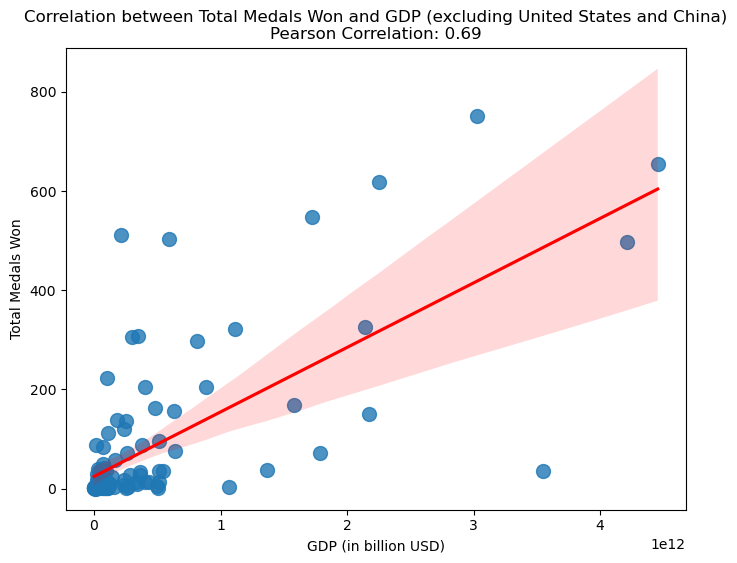

In [94]:
# Repeats the correlation analysis after excluding the USA and China, which are considered outliers, to see how they influence the results.

corr_coefficient, p_value = pearsonr(all_data_df_outliers_drop['total'], all_data_df_outliers_drop['gdp_2023'])

plt.figure(figsize=plot_size)
sns.regplot(x='gdp_2023', y='total', data=all_data_df_outliers_drop, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Total Medals Won')
plt.title(f'Correlation between Total Medals Won and GDP (excluding United States and China)\nPearson Correlation: {corr_coefficient:.2f}')
plt.show()

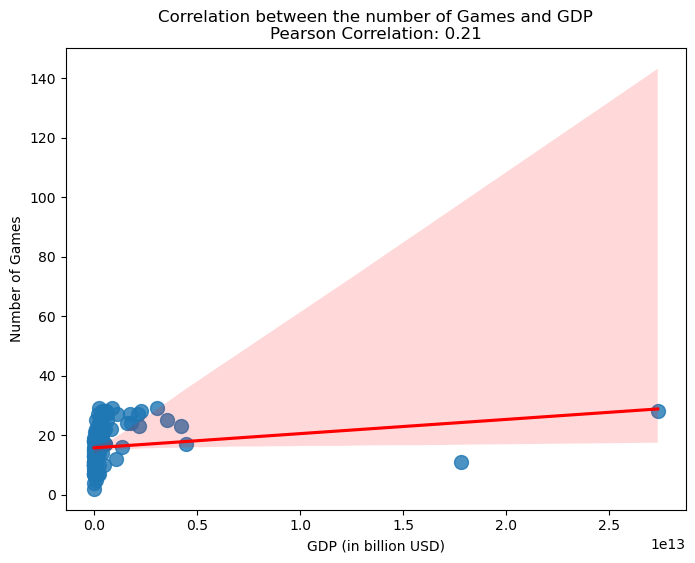

In [95]:
# Correlation between the number of games and GDP
corr_coefficient, p_value = pearsonr(all_data_df['games'], all_data_df['gdp_2023'])

plt.figure(figsize=plot_size)
sns.regplot(x='gdp_2023', y='games', data=all_data_df, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Number of Games')
plt.title(f'Correlation between the number of Games and GDP\nPearson Correlation: {corr_coefficient:.2f}')
plt.show()

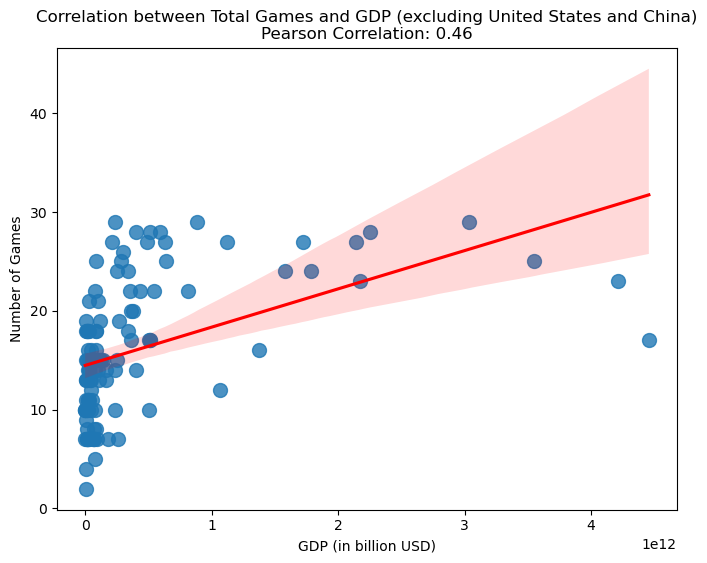

In [96]:
# Correlation between the number of games and GDP without outliers
corr_coefficient, p_value = pearsonr(all_data_df_outliers_drop['games'], all_data_df_outliers_drop['gdp_2023'])

plt.figure(figsize=plot_size)
sns.regplot(x='gdp_2023', y='games', data=all_data_df_outliers_drop, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Number of Games')
plt.title(f'Correlation between Total Games and GDP (excluding United States and China)\nPearson Correlation: {corr_coefficient:.2f}')
plt.show()

## 4. Key Findings

- A strong positive correlation (Pearson correlation coefficient) was identified between a country's GDP and the total number of Olympic medals won, suggesting that wealthier nations tend to perform better in the Olympics.
- The removal of outliers like the USA and China slightly adjusted the correlation, indicating their significant influence on the global athletic performance landscape.
- Visualizations such as stacked bar plots provided a clearer understanding of the distribution of medals across countries, highlighting disparities in Olympic success.

## 5. Conclusions
This analysis demonstrates a clear link between economic power and Olympic success, with wealthier nations generally outperforming others in terms of medal counts. The findings suggest that economic factors may play a significant role in a country's ability to invest in sports and develop competitive athletes. On the other hand, to attend more Olympic Games than other countries has no correlation with winning more medals. These insights could be valuable for policymakers and sports organizations aiming to improve their nations' Olympic performance. For potential employers, this project showcases my ability to handle complex datasets, conduct thorough data analysis, and derive meaningful insights, making it a strong addition to my portfolio as I pursue opportunities in data science.

## 6. References

1. https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table (Consulted on 08/01/2024)
2. https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?end=2023&skipRedirection=true&start=2023&view=bar (Consulted on 08/01/2024)
3. https://www.britannica.com/sports/Olympic-Games (Consulted on 08/05/2024)